# 统计学：检验心理学现象


## 背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。



>[斯特鲁普效应(Stroop effect)](https://baike.baidu.com/item/%E6%96%AF%E7%89%B9%E9%B2%81%E6%99%AE%E6%95%88%E5%BA%94/4903054?fr=aladdin)在心理学中指干扰因素对反应时间的影响。例如当测试者被要求说出某个颜色和其覆盖的文字字面意义不符的词语时，被测者往往会反应速度下降，出错率上升。

>准确的表述是当人们对某一特定刺激作出反应时，由于某种因素的干扰，被刺激者难以集中精力对特定刺激作出反应的现象叫“斯特鲁普效应”，因为这个效应是斯特鲁普发现的，故以其名斯特鲁普效应。

>                                                                                    ----《百度百科》

## 数据探索

In [21]:
# 导入模块
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [26]:
import matplotlib
matplotlib.style.use('ggplot')

In [2]:
# 读取数据
df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [4]:
df.shape

(24, 2)

In [32]:
# 对一致文字条件所用时间进行统计描述
df['Congruent'].describe()

count    24.000000
mean     14.051125
std       3.559358
min       8.630000
25%      11.895250
50%      14.356500
75%      16.200750
max      22.328000
Name: Congruent, dtype: float64

In [33]:
# 对一致文字条件所用时间进行统计描述
df['Incongruent'].describe()

count    24.000000
mean     22.015917
std       4.797057
min      15.687000
25%      18.716750
50%      21.017500
75%      24.051500
max      35.255000
Name: Incongruent, dtype: float64

In [13]:
# 同一参与者不同任务条件所用时间差值
df['diff'] = df['Congruent'] - df['Incongruent']

In [18]:
# 对时间差值进行统计描述
df['diff'].describe()

count    24.000000
mean     -7.964792
std       4.864827
min     -21.919000
25%     -10.258500
50%      -7.666500
75%      -3.645500
max      -1.950000
Name: diff, dtype: float64

In [14]:
# 差值进行正态性检验
stats.normaltest(df['diff'])

NormaltestResult(statistic=7.531697890987548, pvalue=0.02314795254148134)

## 调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

### (1) 我们的自变量是什么？因变量是什么？

根据[参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md)，数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。数据集有24条观测，分别为24位观测者的情况。

我们的**自变量**是任务的条件，即一致文字条件，和不一致文字条件；**因变量**是参与者完成任务的时间，预期假设是一致文字条件下所用时间将少于不一致文字条件下所用时间。

### (2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

本试验是同一参与者参与不同条件任务的反应时间，所以采用配对试验检验，根据资料情况选择是配对t检验还是配对秩和检验。对参与者不同条件时间做差，记作$M_0$，对差值进行正太性检验，得到p值为0.023，则差值不满足正态性，采用配对秩和检验。假设检验如下：

H0: 参与者对一致文字条件和不一致文字条件反应时间差值中位数为0，$M_0=0$；

H1: 参与者对一致文字条件反应时间和不一致条件反应时间差值中位数不为0，$M_0\neq 0$；

𝞪 = 0.05

### (3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

- 24位参与者对一致文字条件所用时间中位数为14.36秒，四分位数为（11.90，16.20）秒；

- 24位参与者对不一致文字条件所用时间中位数为21.02秒，四分位数为（18.72，24.05）秒；

- 对不同任务所用时间差值进行统计描述，一致文字条件所用时间和不一致文字条件所用时间差值的中位数是-7.66秒，四分位数是（-10.26，-3.65）秒。

### (4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

(array([0.02086568, 0.        , 0.02086568, 0.        , 0.        ,
        0.10432838, 0.10432838, 0.0834627 , 0.02086568, 0.14605973]),
 array([-21.919 , -19.9221, -17.9252, -15.9283, -13.9314, -11.9345,
         -9.9376,  -7.9407,  -5.9438,  -3.9469,  -1.95  ]),
 <a list of 10 Patch objects>)

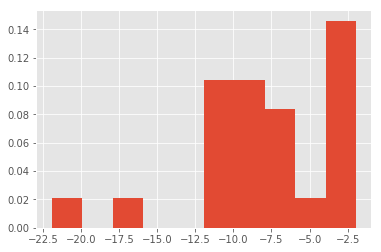

In [29]:
# 时间差值直方图
plt.hist(df['diff'])

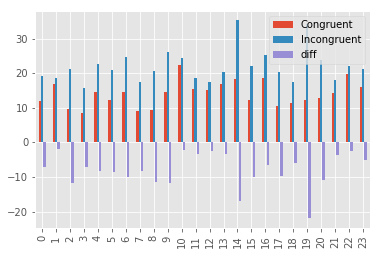

In [27]:
# 不同观测者不同任务所用时间直条图
df.plot(kind = 'bar')

从上图可以看出来，参与者一致文字条件所用时间要少于不一致文字条件所用时间，两者差值都是负值。

### (5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

In [30]:
# 时间差值进行秩和检验
stats.wilcoxon(df['diff'])

WilcoxonResult(statistic=0.0, pvalue=1.821529714896801e-05)

经秩和检验，p < 0.001，在𝞪 = 0.05水准拒绝零假设，可得到参与者对一致文字条件反应时间和不一致条件反应时间中位数不同，根据一致文字条件所用时间中位数14.36秒小于不一致文字条件所用时间中位数21.02秒，可得到参与者对于一致文字条件所用时间要少于不一致文字条件所用时间。和预期的一致。

#### 参考文献
http://pandas.pydata.org/pandas-docs/version/0.17.0/visualization.html